In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Titanic-Dataset.csv")

In [32]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [33]:
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())

if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [34]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [35]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Age', 'Fare']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


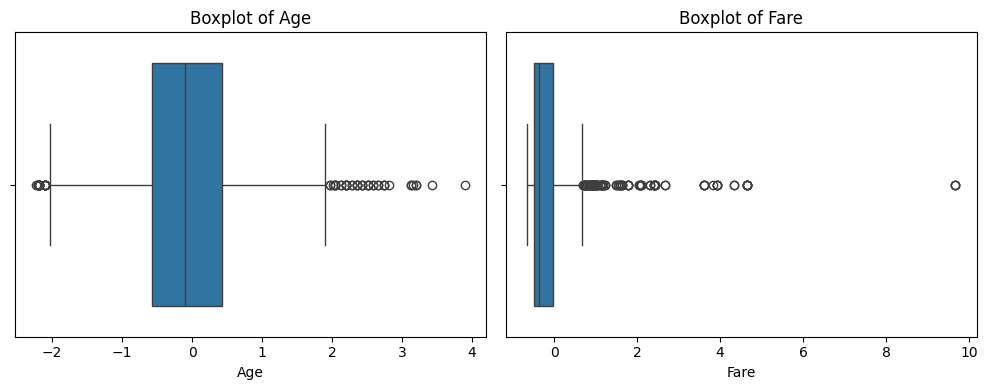

(718, 12)


In [36]:
plt.figure(figsize=(10, 4))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print(df.shape)